In [61]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [10]:
train = pd.read_csv(r"C:\Users\YY\Desktop\train.csv")
store = pd.read_csv(r"C:\Users\YY\Desktop\stores.csv")
oil = pd.read_csv(r"C:\Users\YY\Desktop\oil.csv")
holidays = pd.read_csv(r"C:\Users\YY\Desktop\holidays_events.csv")

In [11]:
train.shape

(3000888, 6)

In [12]:
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [13]:
train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [14]:
train = train.drop(columns = "id")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [16]:
train["date"] = pd.to_datetime(train["date"])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [18]:
store.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [19]:
oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [20]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [21]:
oil["date"] = pd.to_datetime(oil["date"])

In [22]:
df = train.merge(store, how = "left", on = "store_nbr")

In [23]:
df = df.merge(oil, how = "left", on = "date")

In [24]:
df.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN
5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN
6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN
7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN
8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN
9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN


In [25]:
df.isna().sum()

date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
type                0
cluster             0
dcoilwtico     928422
dtype: int64

In [26]:
df["dcoilwtico"] = df["dcoilwtico"].interpolate()
df.isna().sum()

date              0
store_nbr         0
family            0
sales             0
onpromotion       0
city              0
state             0
type              0
cluster           0
dcoilwtico     1782
dtype: int64

In [27]:
df["dcoilwtico"] = df["dcoilwtico"].fillna(method = "bfill").fillna(method = "ffill")
df.isna().sum()

C:\Users\YY\AppData\Local\Temp\ipykernel_1652\2702746996.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["dcoilwtico"] = df["dcoilwtico"].fillna(method = "bfill").fillna(method = "ffill")


date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
dtype: int64

In [28]:
holidays["date"] = pd.to_datetime(holidays["date"])

In [29]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [30]:
holidays["is_holiday"] = 1
hol_flag = holidays[["date", "is_holiday"]].drop_duplicates()

In [31]:
df = df.merge(hol_flag, how = "left", on = "date")
df

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_holiday
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14,1.0
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,1.0
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14,1.0
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14,1.0
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,1.0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,1.0
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,1.0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,1.0


In [32]:
df.isna().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type                 0
cluster              0
dcoilwtico           0
is_holiday     2551824
dtype: int64

In [33]:
df["is_holiday"] = df["is_holiday"].fillna(0)
df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
is_holiday     0
dtype: int64

In [34]:
# Date features
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["dayofyear"] = df["date"].dt.dayofyear
df

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_holiday,day,dayofweek,month,year,dayofyear
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,1.0,15,1,8,2017,227
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,1.0,15,1,8,2017,227
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,1.0,15,1,8,2017,227
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,1.0,15,1,8,2017,227


In [35]:
# Aggregations
store_avg = df.groupby("store_nbr")["sales"].mean().rename("store_avg_sales")
df = df.join(store_avg, on = "store_nbr")
df.head(10)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,is_holiday,day,dayofweek,month,year,dayofyear,store_avg_sales
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889
9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,93.14,1.0,1,1,1,2013,1,254.534889


In [36]:
# Lag features (previous sales)
df = df.sort_values(["store_nbr", "family", "date"])
for lag in [7, 14, 28]:
    df[f"lag_{lag}"] = df.groupby(["store_nbr", "family"])["sales"].shift(lag)

In [37]:
# Rolling averages
for win in [7, 14]:
    df[f"roll_mean_{win}"] = df.groupby(["store_nbr", "family"])["sales"].shift(1).rolling(win).mean()

In [38]:
# Drop rows with NaNs created by lags
df = df.dropna()

In [39]:
features = [
    "onpromotion", "is_holiday", "dayofweek", "month", "dayofyear",
    "store_avg_sales", "lag_7", "lag_14", "lag_28", "roll_mean_7", "roll_mean_14", "dcoilwtico"
]

In [40]:
x = df[features]
y = df["sales"]

# Train-Test Split

In [41]:
split_date = df["date"].quantile(0.85)  # last 15% of dates as test
train_idx = df["date"] <= split_date
test_idx = df["date"] > split_date

In [42]:
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# Fit Models

In [43]:
split_date = df["date"].quantile(0.85)
train_idx = df["date"] <= split_date
test_idx = df["date"] > split_date
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

In [44]:
cv = TimeSeriesSplit(n_splits=3)

In [45]:
ridge_pipe = Pipeline([("scaler", StandardScaler()), ("model", Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, {"model__alpha": [0.01, 0.1, 1, 10, 100]},
                          cv=cv, scoring="neg_root_mean_squared_error")

In [46]:
ridge_grid.fit(x_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)


Best Ridge alpha: {'model__alpha': 100}


In [47]:
lasso_pipe = Pipeline([("scaler", StandardScaler()), ("model", Lasso(max_iter=5000))])
lasso_grid = GridSearchCV(lasso_pipe, {"model__alpha": [0.001, 0.01, 0.1, 1, 10]},
                          cv=cv, scoring="neg_root_mean_squared_error")

In [48]:
lasso_grid.fit(x_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_)

Best Lasso alpha: {'model__alpha': 0.001}


In [49]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_grid.best_params_["model__alpha"]),
    "Lasso": Lasso(alpha=lasso_grid.best_params_["model__alpha"], max_iter=5000)
}

In [50]:
results = []
for name, model in models.items():
    pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    results.append([name, rmse, mae])

c:\Users\YY\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\YY\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\YY\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE"])
print(results_df)

    Model        RMSE        MAE
0  Linear  348.473157  92.950657
1   Ridge  348.421638  92.953241
2   Lasso  348.471841  92.946303


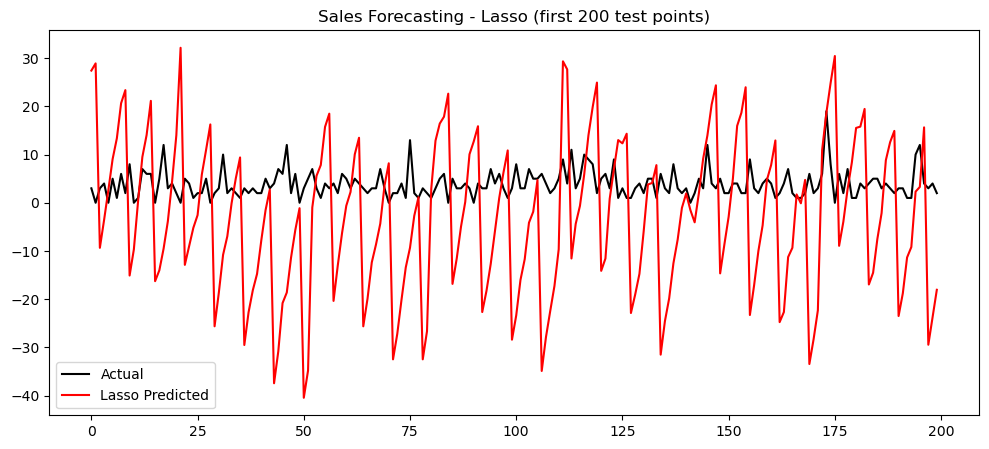

In [52]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual", color="black")
plt.plot(preds[:200], label=f"{name} Predicted", color="red")
plt.legend()
plt.title(f"Sales Forecasting - {name} (first 200 test points)")
plt.show()

In [54]:
def coef_importances(pipe, feature_names):
    coefs = pipe.named_steps["model"].coef_
    return pd.Series(coefs, index=feature_names).sort_values(ascending=False)

In [55]:
ridge_pipe.fit(x_train, y_train)
ridge_importances = coef_importances(ridge_pipe, features)

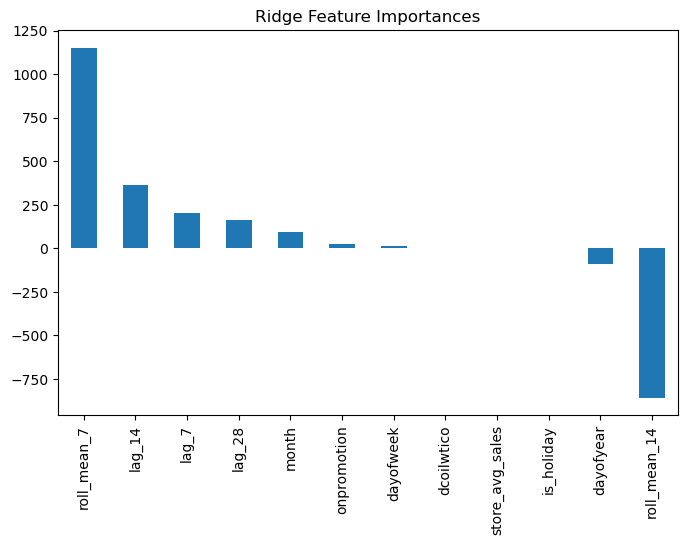

In [56]:
plt.figure(figsize=(8,5))
ridge_importances.plot(kind="bar")
plt.title("Ridge Feature Importances")
plt.show()

In [57]:
lasso_pipe.fit(x_train, y_train)
lasso_importances = coef_importances(lasso_pipe, features)

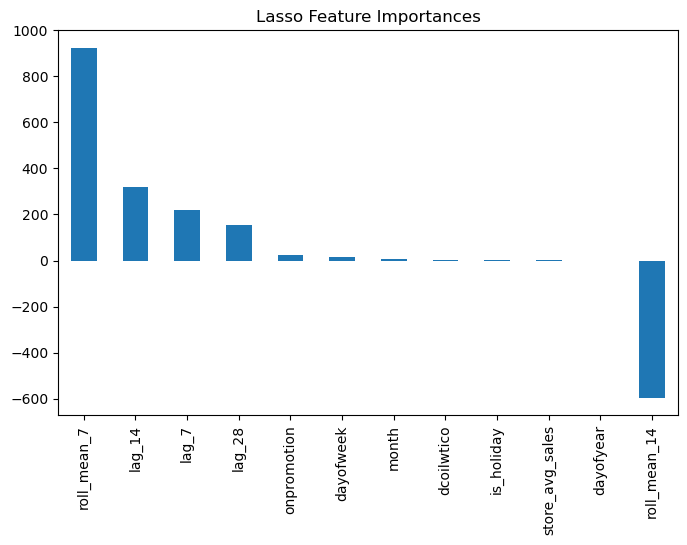

In [58]:
plt.figure(figsize=(8,5))
lasso_importances.plot(kind="bar")
plt.title("Lasso Feature Importances")
plt.show()